In [3]:
# Visualisation and classification of datasets in scikit-learn and matplotlib

import numpy as np
import matplotlib.pyplot as plt
import mkl

mkl.set_num_threads(4)
np.random.seed(1234)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [2]:
# arrange 2D matrices as tiles (takes 4D `examples` tensor with dims: rows x cols x tile_height x tile_width)
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]
    
    space_between_tiles = 2
    # img_matrix = np.empty(shape=( ??? ))
    # img_matrix.fill(np.nan)
    img_matrix = np.empty(shape=(rows_count * (tile_height + space_between_tiles) - space_between_tiles, cols_count * (tile_width + space_between_tiles) - space_between_tiles))
    img_matrix.fill(np.nan)
    
    for ex_row, row in enumerate(np.arange(0, img_matrix.shape[0], step=tile_height + space_between_tiles)):
        for ex_col, col in enumerate(np.arange(0, img_matrix.shape[1], step=tile_width+space_between_tiles)):
            img_matrix[row : row + tile_height, col : col + tile_width] = examples[ex_row, ex_col, :, :]

    # raise Exception("Not implemented!")
    
    return img_matrix

## MNIST Dataset

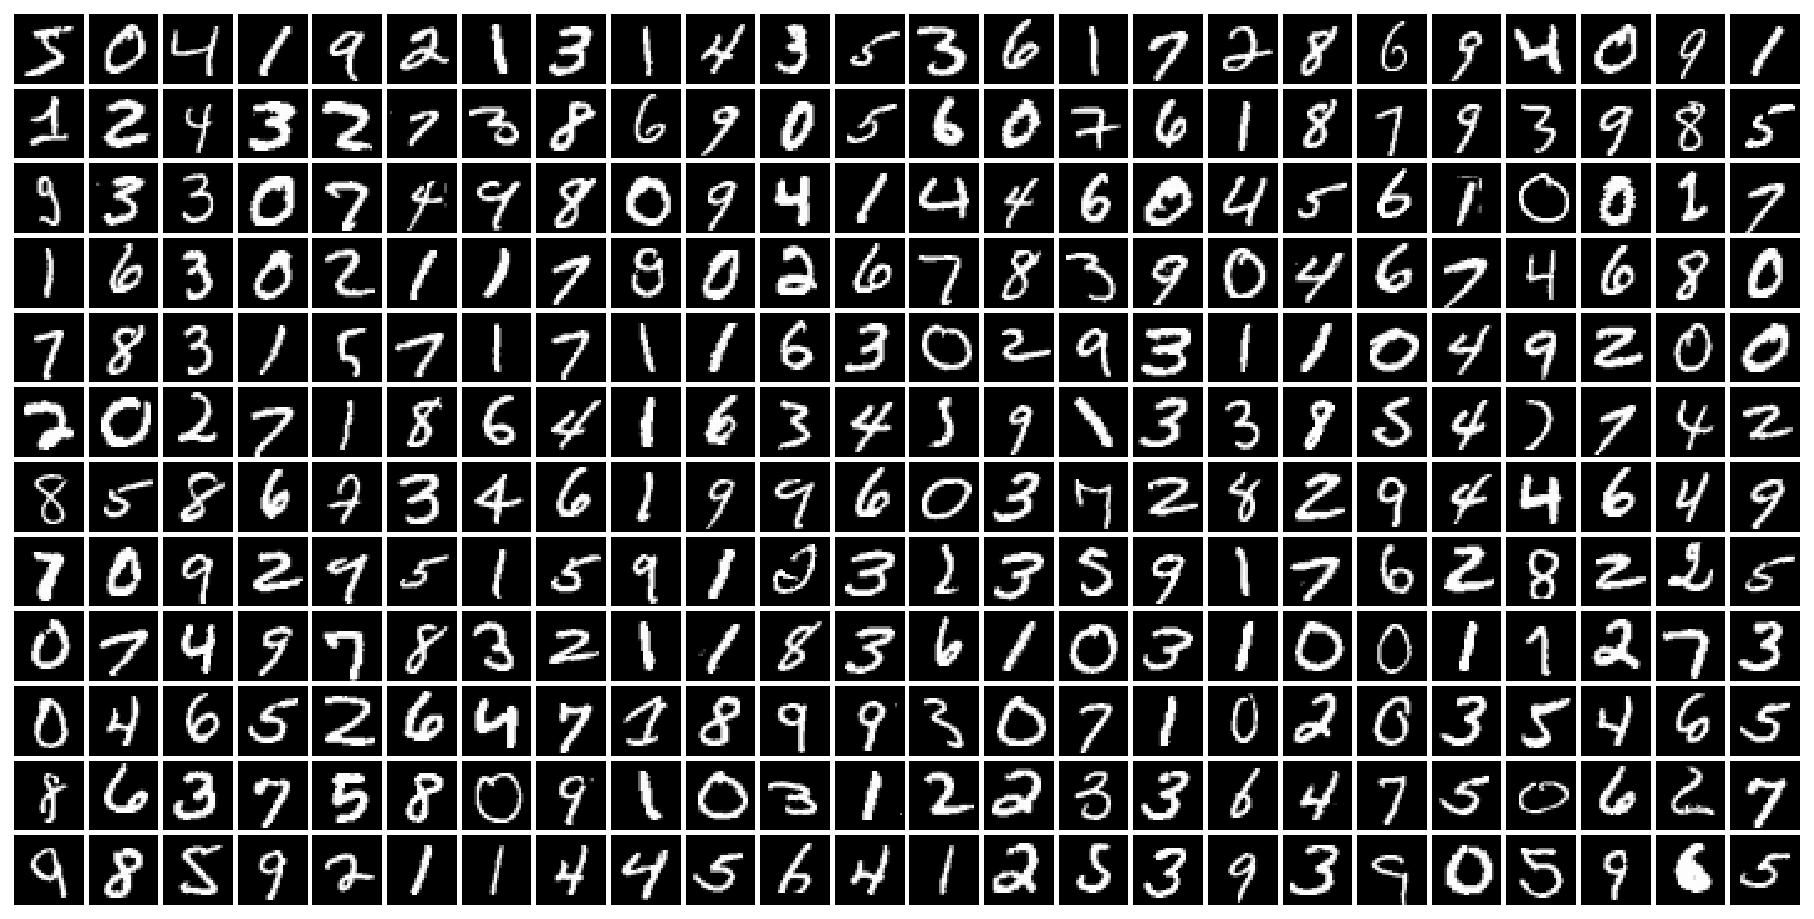

In [5]:
import mnist
digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [6]:
X = mnist.train_images().astype(np.float32) / 255.0
y = mnist.train_labels()
X.shape

(60000, 28, 28)

Reshape `X` so that the last two dimensions are collapsed into single dimension.

In [10]:
# X = ????
X = X.reshape(60000, -1)

# raise Exception("Not implemented!")

In [11]:
X.shape

(60000, 784)

## Visualizing the distribution of MNIST digits

Add a scatter plot to `plot`, which:
* displys the first two dimensions of `X`,
* includes only these elements from `X` for which `y == i` (i.e. elements from the i-th class),
* includes label (i.e. `i`) in the legend.


In [24]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        # digit_indeces = ???
        # dim1 = ???
        # dim2 = ???
        # plot.scatter(???)
        
        digit_indices = y == i
        dim1 = X.shape[0]
        dim2 = X.shape[1]
        plot.scatter(X[digit_indices, 0], X[digit_indices, 1], label=f"Digit{i}")
        
        # raise Exception("Not implemented!")

    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Principal Component Analysis (PCA)

In [25]:
SAMPLES_LIMIT = 2000
X_small = X[:SAMPLES_LIMIT]
y_small = y[:SAMPLES_LIMIT]

Use PCA function to embed `X_small` in two dimensions. Store the result in `X_pca_embedded`.

In [26]:
from sklearn.decomposition import PCA

# pca = PCA(???)
# X_pca_embedded = ???

pca = PCA(n_components=2)
X_pca_embedded = pca.fit_transform(X_small)

# raise Exception("Not implemented!")

In [27]:
X_pca_embedded.shape

(2000, 2)

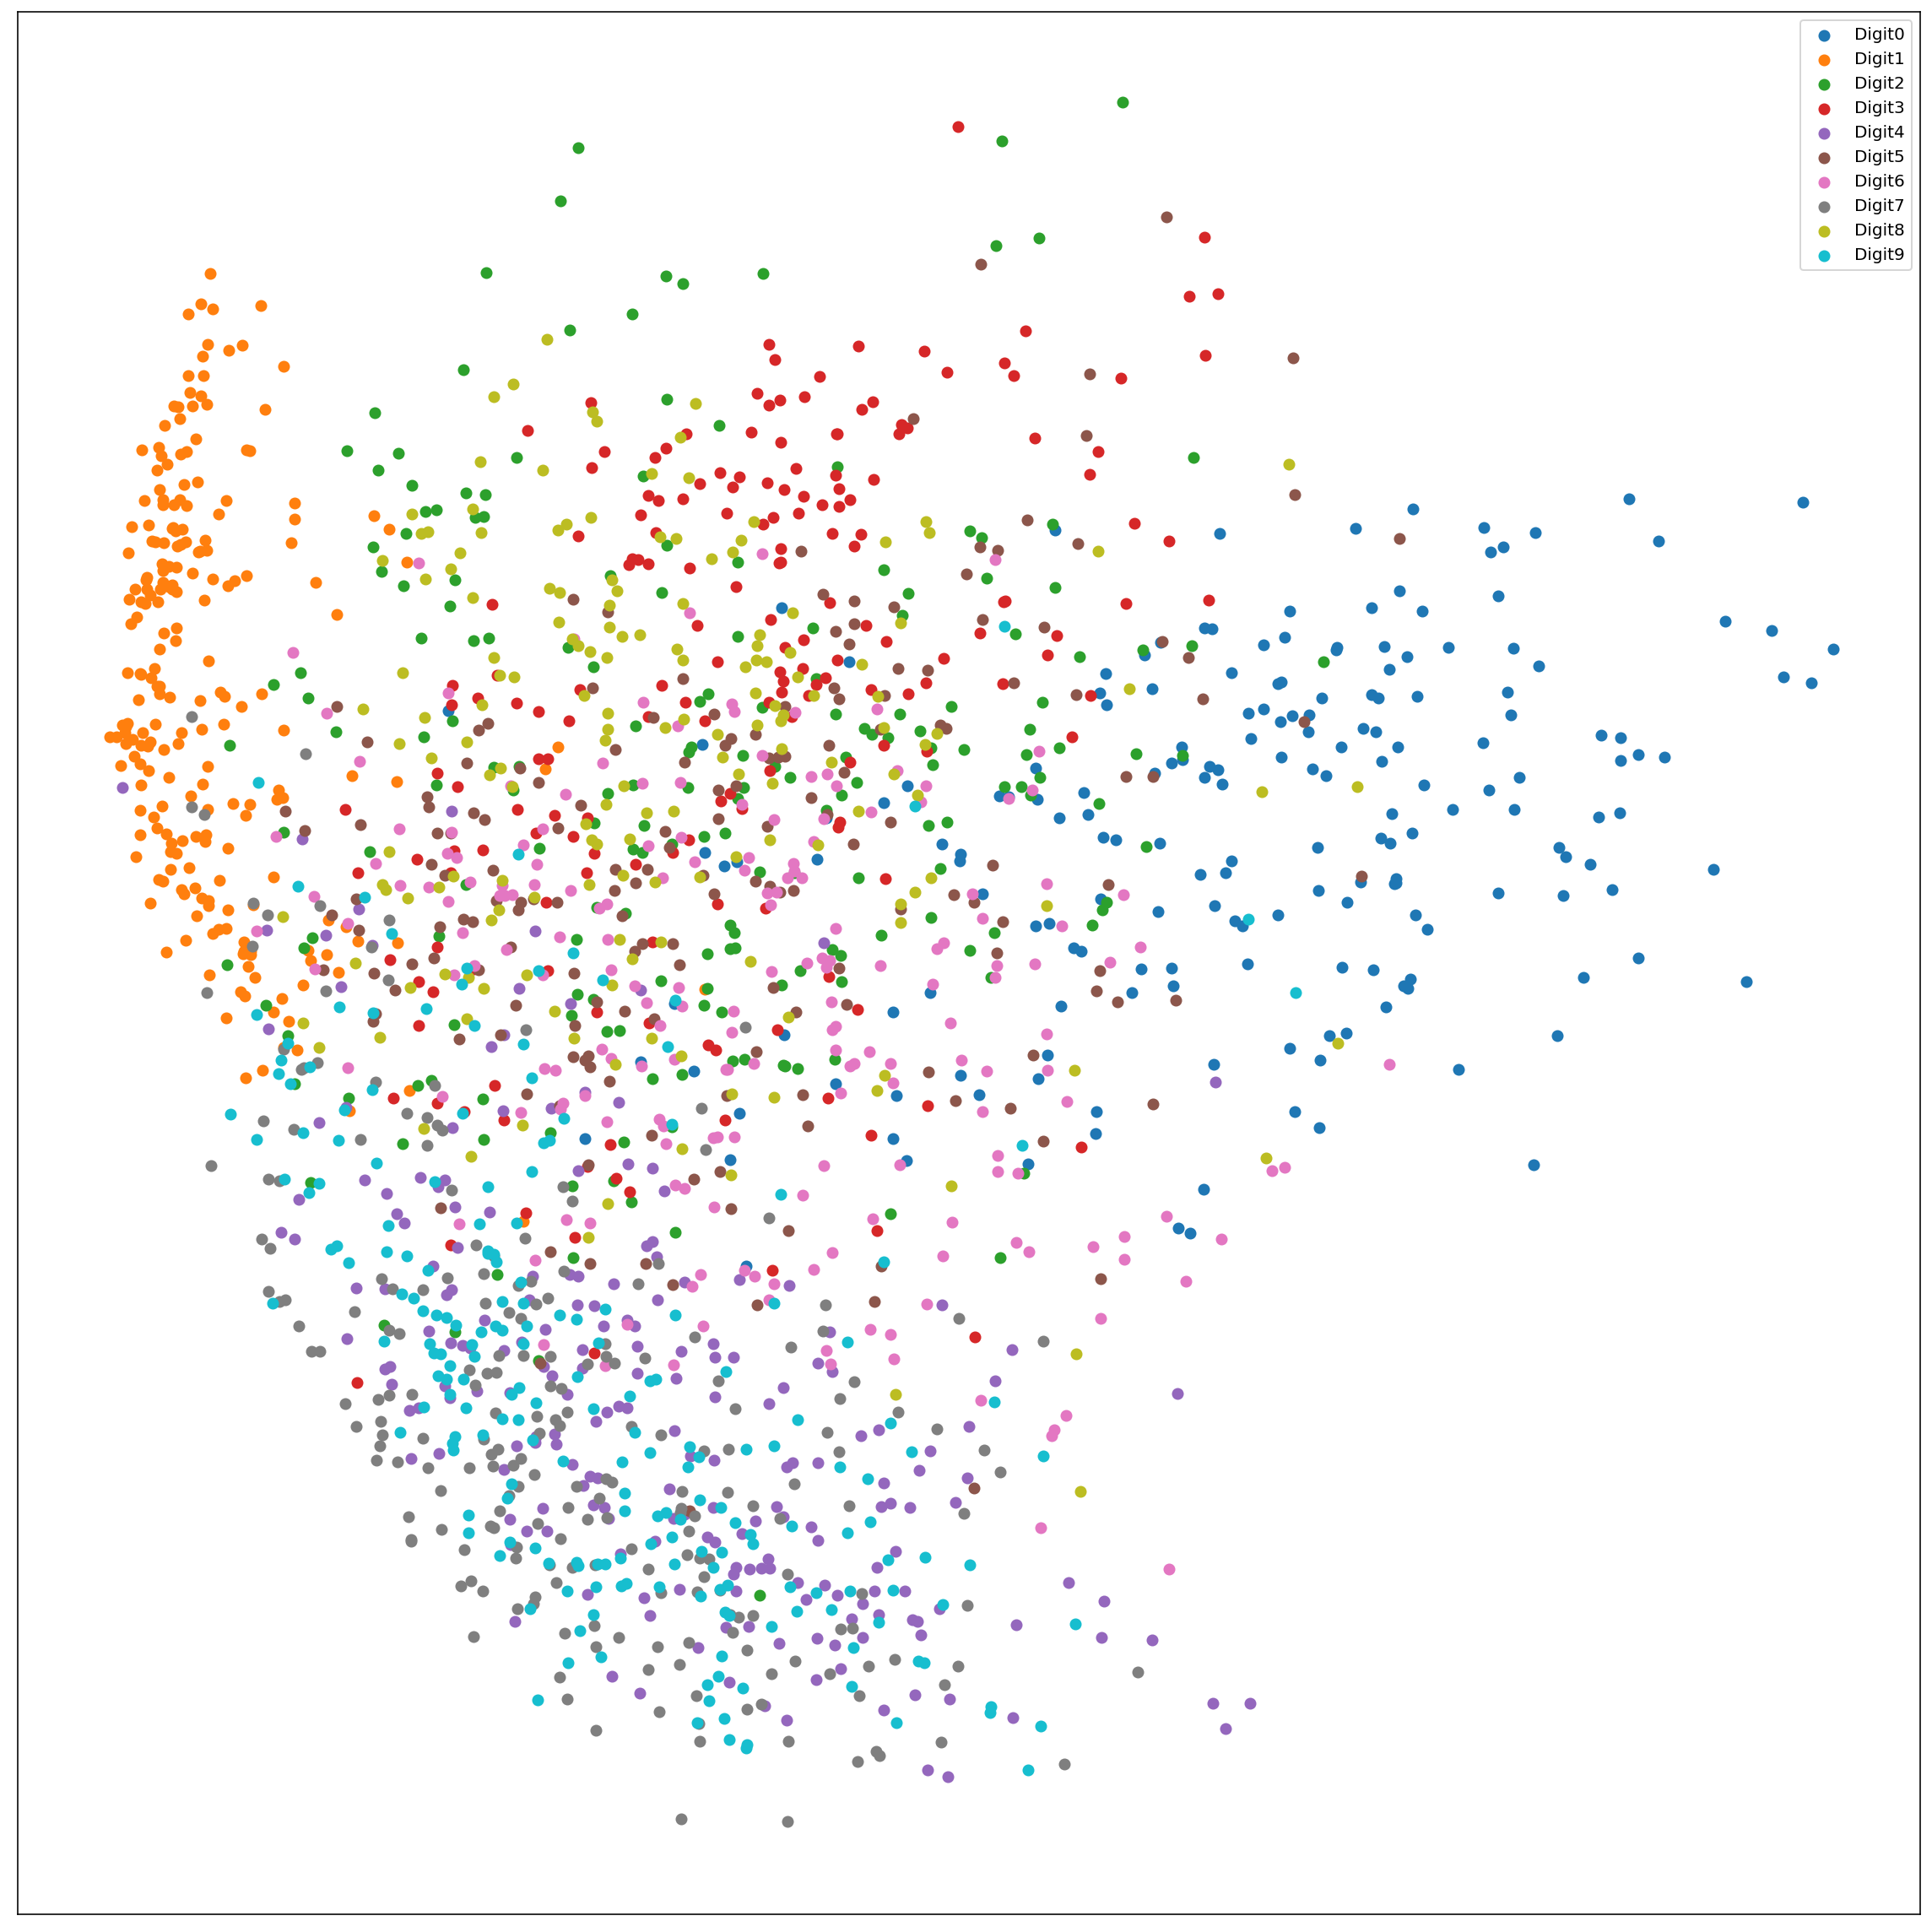

In [28]:
plot_2d_mnist_scatter(X_pca_embedded, y_small)

### T-distributed Stochastic Neighbour Embedding (T-SNE)

Make sure to have a look on this increadible [article on T-SNE](https://distill.pub/2016/misread-tsne/).

Use `T-SNE` function to embed `X_small` in two dimensions. Store the result in `X_tsne_embedded`. <BR>
Use:
 * `n_iter=500` argument to limit the number of T-SNE iterations, 
 * `verbose=2` argument to see a verbose output during embedding.

In [37]:
from sklearn.manifold import TSNE

# tsne = TSNE(???)
# X_tsne_embedded = ???

tsne = TSNE(n_components=2, n_iter=500)
X_tsne_embedded = tsne.fit_transform(X_small, y_small)

# raise Exception("Not implemented!")

In [34]:
X_tsne_embedded.shape

(2000, 2)

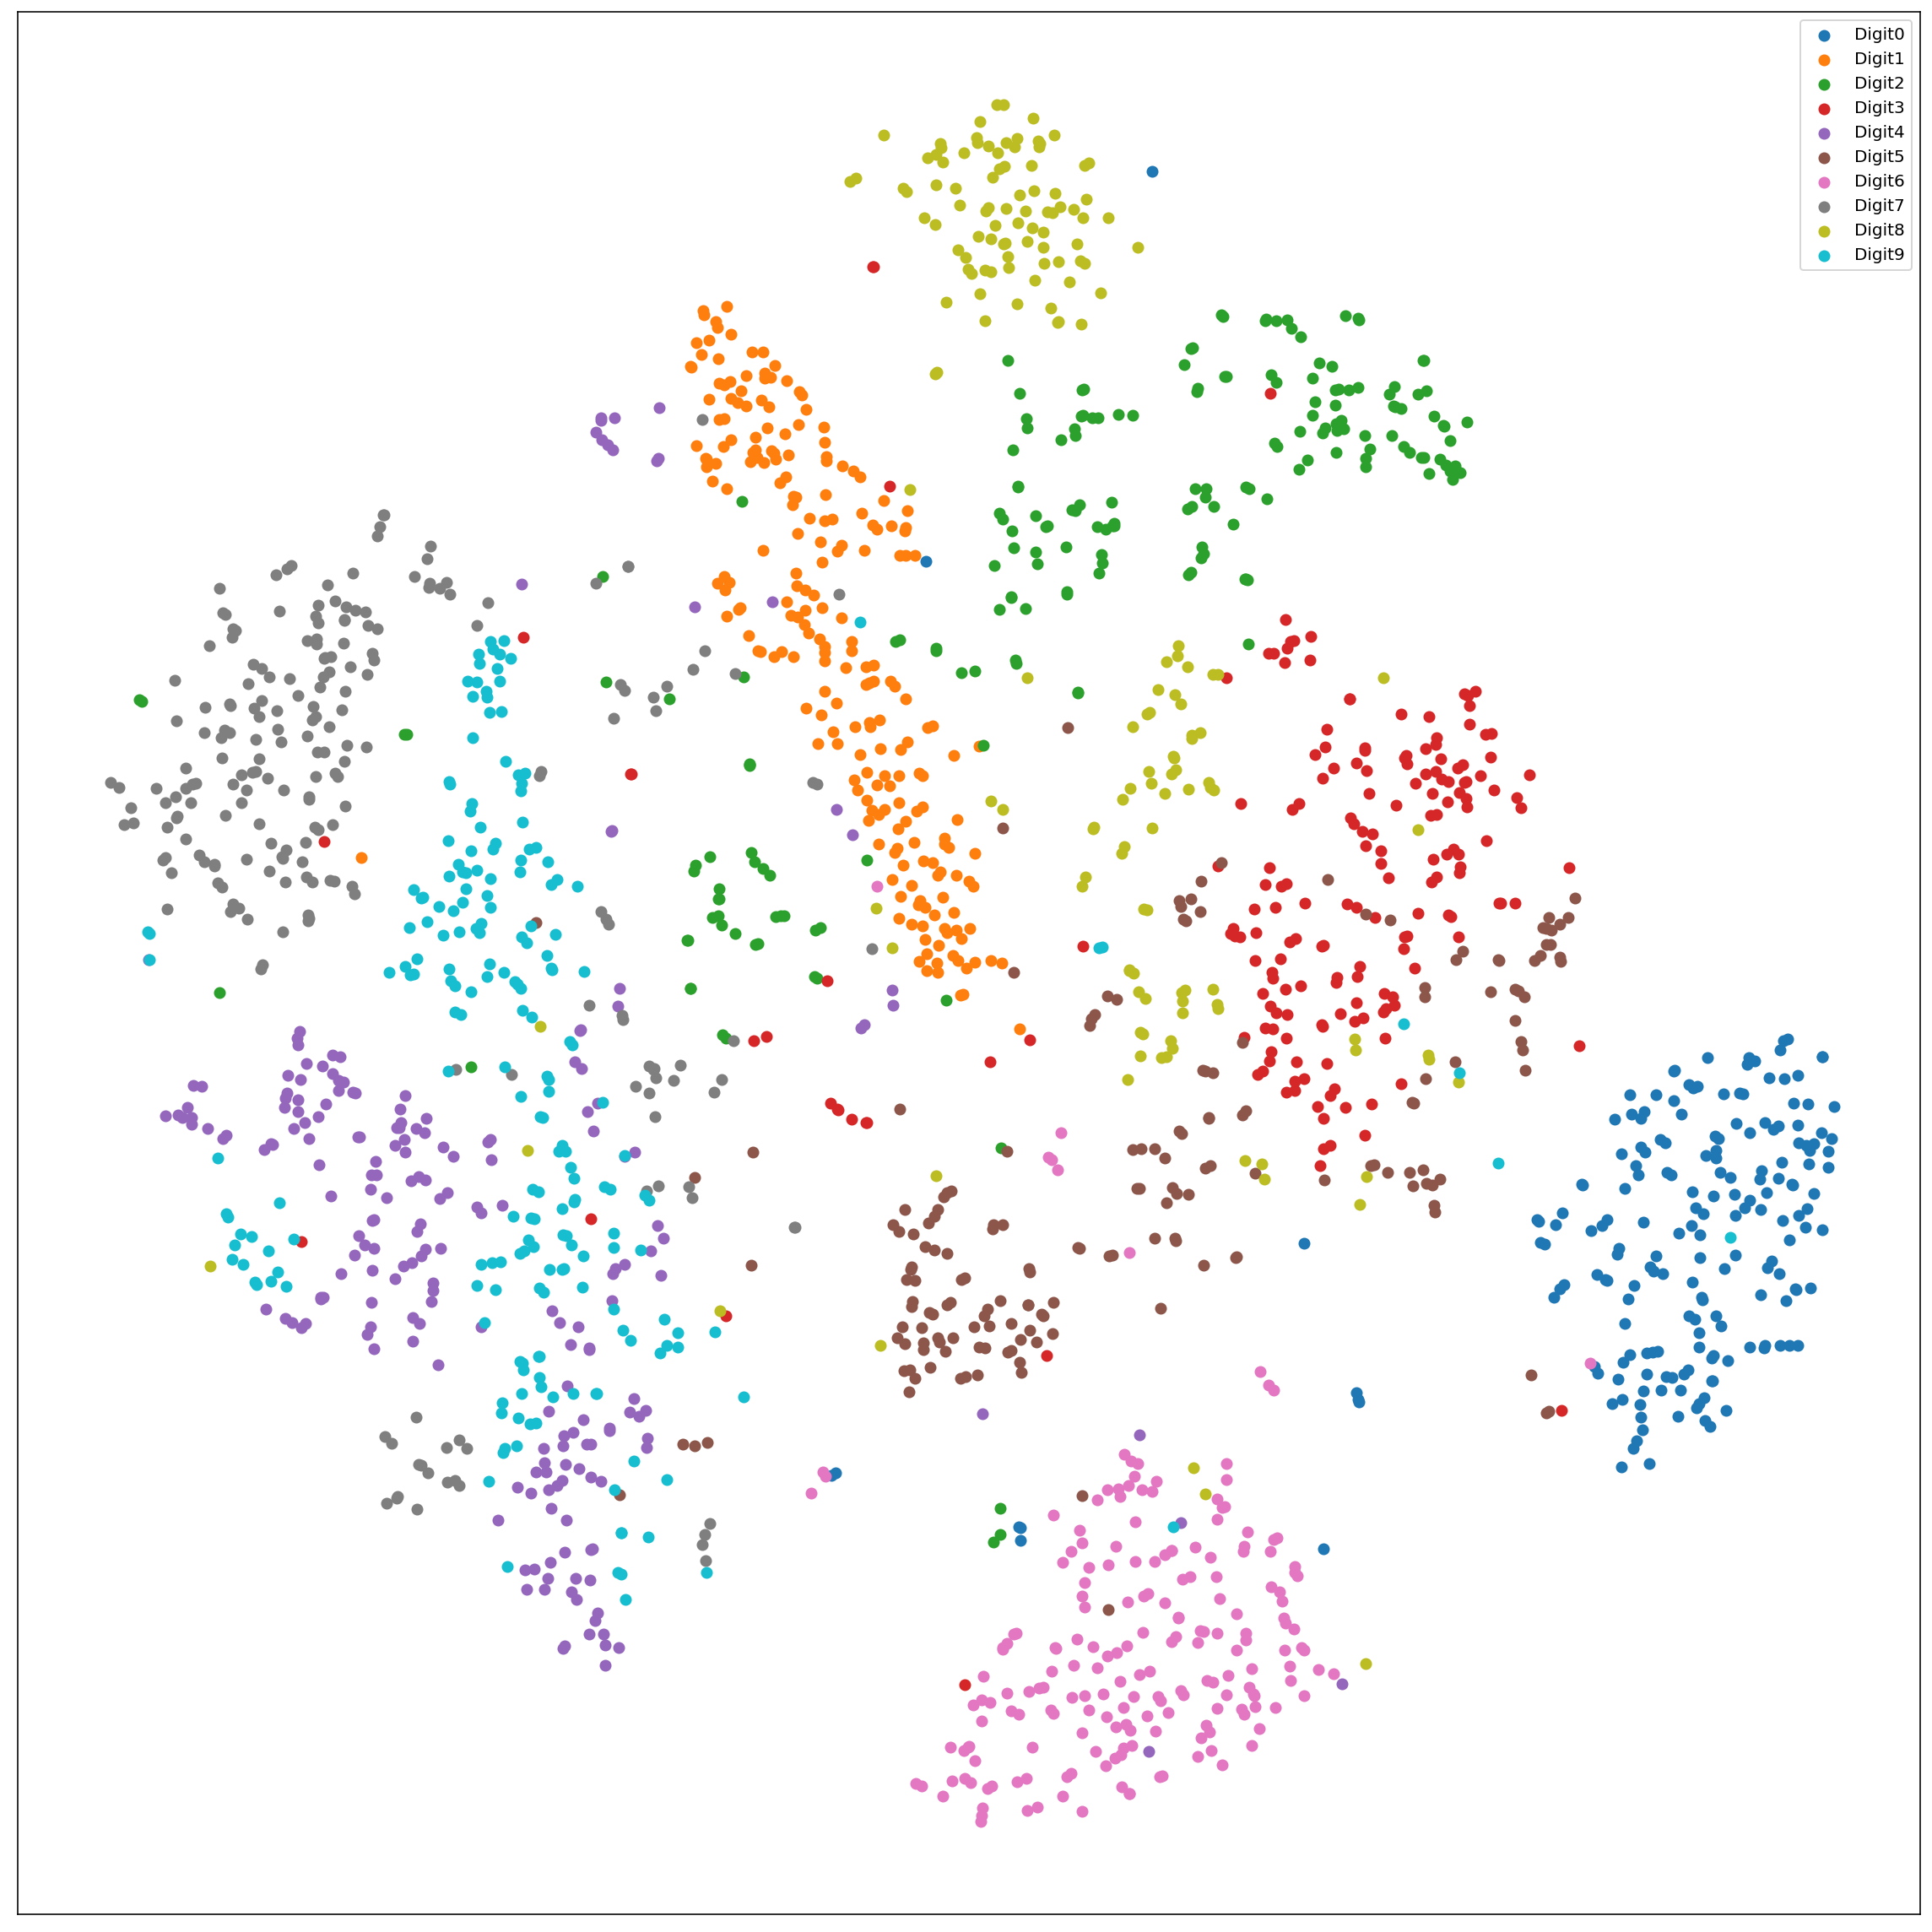

In [35]:
plot_2d_mnist_scatter(X_tsne_embedded, y_small)

### 3D interactive plots with plotly

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

def plot_3d_mnist_plotly_scatter(X, y):
    def make_trace(i):
        digit_indeces = y == i
        return go.Scatter3d(
            x=X[digit_indeces, 0],
            y=X[digit_indeces, 1],
            z=X[digit_indeces, 2],
            mode='markers',
            name=str(i),
            marker=dict(
                color=i,
                colorscale='Jet',
                size=4,
                symbol='circle',
                line=dict(
                    color='rgb(204, 204, 204)',
                    width=1
                )
            )
        )
        
    traces = [make_trace(i) for i in range(10)]
    
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)

Use PCA function to embed `X_small` in **three** dimensions. Store the result in `X_3d_pca_embedded`.

In [30]:
# pca_3d = PCA(???)
# X_3d_pca_embedded = ???

pca_3d = PCA(n_components=3)
X_3d_pca_embedded = pca_3d.fit_transform(X_small, y_small)

# raise Exception("Not implemented!")

In [31]:
X_3d_pca_embedded.shape

(2000, 3)

In [32]:
plot_3d_mnist_plotly_scatter(X_3d_pca_embedded, y_small)

NameError: name 'plot_3d_mnist_plotly_scatter' is not defined

## Classification task

In [43]:
from sklearn.model_selection import train_test_split
SAMPLES_LIMIT=10000
X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLES_LIMIT], y[:SAMPLES_LIMIT], test_size=0.2)

In [44]:
from sklearn import svm
classifier = svm.SVC(C=1, gamma=0.001)
classifier.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
from sklearn import metrics

predicted = classifier.predict(X_test)

print("Classification report for classifier {}:\n{}\n".format(
    classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       199
          1       0.92      0.99      0.95       246
          2       0.90      0.87      0.89       191
          3       0.91      0.85      0.88       219
          4       0.92      0.93      0.93       198
          5       0.87      0.91      0.89       176
          6       0.94      0.96      0.95       185
          7       0.94      0.95      0.95       203
          8       0.91      0.85      0.88       190
          9       0.91      0.89      0.90       193

avg / total       0.92      0.92      0.92      2000




Calculate and display the confision matrix for `predicted` and `y_test` (use metrics package).

In [46]:
# confusion_matrix = ???
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)

# raise Exception("Not implemented!")

print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[192   0   1   0   0   2   1   0   3   0]
 [  0 243   1   1   0   0   0   0   0   1]
 [  3   6 167   1   5   1   4   1   3   0]
 [  1   4   4 186   0  12   1   3   6   2]
 [  1   2   2   0 184   0   2   3   0   4]
 [  1   3   0   4   2 160   3   0   3   0]
 [  2   0   1   0   3   2 177   0   0   0]
 [  0   2   1   0   1   0   0 193   1   5]
 [  1   1   6   8   1   6   1   0 162   4]
 [  4   3   2   4   3   0   0   5   0 172]]
